<a href="https://colab.research.google.com/github/TheJJL/Proyecto-Final-TG/blob/main/Resumen_Resultados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/MyDrive/Universidad - Ingeniería Electrónica/10 Semestre/Trabajo de Grado II/'
#path = '/content/drive/MyDrive/Trabajo de Grado II/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import shutil
import numpy as np
import random
import seaborn
import pandas as pd
from os import listdir
from PIL import Image 
from numpy import asarray


from numpy import expand_dims
from numpy import eye
from numpy import load
from numpy import savez_compressed
from random import choice
from matplotlib import pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from keras.models import load_model 
from sklearn.metrics import confusion_matrix, classification_report  

%matplotlib inline

# 1. Modelo de Deep Learning: Facenet (InceptionResNetV2)

In [ ]:
# Carga del conjunto de datos comprimido
data = load(path + 'data_reconocimiento1/faces-dataset-VGG_indian.npz')
trainX, trainY, testX, testY = data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3']
print('Tamaño de data train:', trainX.shape)
print('Tamaño de data test:', testX.shape)

Tamaño de data train: (2696, 160, 160, 3)
Tamaño de data test: (1000, 160, 160, 3)


In [ ]:
# Estandarización de los datos de entrenamiento y test
trainX = trainX/255
testX = testX/255
trainY = to_categorical(trainY)
testY = to_categorical(testY)
random.seed(10)

Sujeto #[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


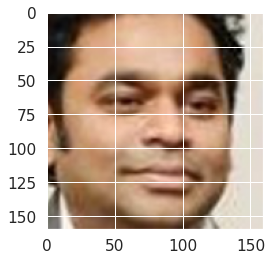

In [ ]:
# Ejemplo
print('Sujeto #{}'.format(trainY[20]))
plt.imshow(trainX[20])

## 1.1 Modelo con base de datos Yale para condiciones de iluminación
---
Modelo 7: (BTH = 30, EHS = 50, ValidSplit = 0.2, Dropout = 0, INI = HeNormal, REG = L2, OPT = adam[0.001])


In [ ]:
# Carga del modelo obtenido durante el entrenamiento, evaluación del modelo con trainX, testX y generamos las predicciones a partir del testX
load_facenet_model_yale7 = load_model(path + 'data_reconocimiento1/models_YALE1/facenet_model_yale1_7.h5')

# Evaluación del modelo
train_loss, train_acc = load_facenet_model_yale7.evaluate(trainX, trainY)
test_loss, test_acc = load_facenet_model_yale7.evaluate(testX, testY)

18/18 [==============================] - 34s 2s/step - loss: 0.2227 - accuracy: 0.9912


In [ ]:
# Matriz de confusión usando Scikit Learn
predY = load_facenet_model_yale7.predict(testX)  
predictedY = np.argmax(predY, axis=1)  #revisar el bias adecuado

#Creamos la matriz de confusión
facenet_model_yale7_CM = confusion_matrix(np.argmax(testY, axis=1), predictedY)

18/18 [==============================] - 40s 2s/step


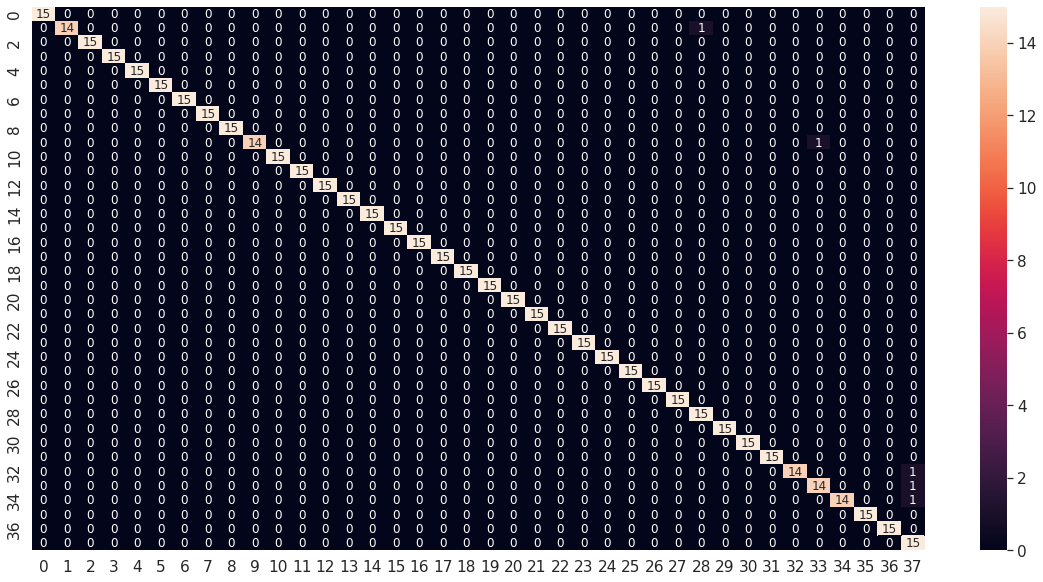

In [ ]:
# Visualizamos la matriz de confusión
facenet_model_yale7_df_CM = pd.DataFrame(facenet_model_yale7_CM, range(38), range(38))  
plt.figure(figsize = (20,10))  
seaborn.set(font_scale=1.4) #for label size  
seaborn.heatmap(facenet_model_yale7_df_CM, annot=True, annot_kws={"size": 12}) # font size  
plt.show()  

In [ ]:
# Resumen de clasificación
facenet_model_yale7_report = classification_report(np.argmax(testY, axis=1), predictedY, digits=4)  
print(facenet_model_yale7_report)

              precision    recall  f1-score   support

           1     1.0000    1.0000    1.0000        15
           2     1.0000    0.9333    0.9655        15
           3     1.0000    1.0000    1.0000        15
           4     1.0000    1.0000    1.0000        15
           5     1.0000    1.0000    1.0000        15
           6     1.0000    1.0000    1.0000        15
           7     1.0000    1.0000    1.0000        15
           8     1.0000    1.0000    1.0000        15
           9     1.0000    1.0000    1.0000        15
          10     1.0000    0.9333    0.9655        15
          11     1.0000    1.0000    1.0000        15
          12     1.0000    1.0000    1.0000        15
          13     1.0000    1.0000    1.0000        15
          15     1.0000    1.0000    1.0000        15
          16     1.0000    1.0000    1.0000        15
          17     1.0000    1.0000    1.0000        15
          18     1.0000    1.0000    1.0000        15
          19     1.0000    

## 1.2 Modelo con base de datos ROF 1 para condiciones de oclusion
---
Modelo 2: (BTH = 30, EHS = 80, ValidSplit = 0.2, Dropout=0, INI = HeNormal, REG = L2, OPT = adam[0.001])


In [ ]:
# Carga del modelo obtenido durante el entrenamiento, evaluación del modelo con trainX, testX y generamos las predicciones a partir del testX
load_facenet_model_oclu1_2 = load_model(path + 'data_reconocimiento1/models_ROF1/facenet_model_ROF1_2.h5')

# Evaluación del modelo
train_loss, train_acc = load_facenet_model_oclu1_2.evaluate(trainX, trainY)
test_loss, test_acc = load_facenet_model_oclu1_2.evaluate(testX, testY)

7/7 [==============================] - 0s 48ms/step - loss: 2.9388 - accuracy: 0.3050


In [ ]:
# Matriz de confusión usando Scikit Learn
predY = load_facenet_model_oclu1_2.predict(testX)  
predictedY = np.argmax(predY, axis=1)  #revisar el bias adecuado

#Creamos la matriz de confusión
facenet_model_oclu1_2_CM = confusion_matrix(np.argmax(testY, axis=1), predictedY)

7/7 [==============================] - 2s 45ms/step


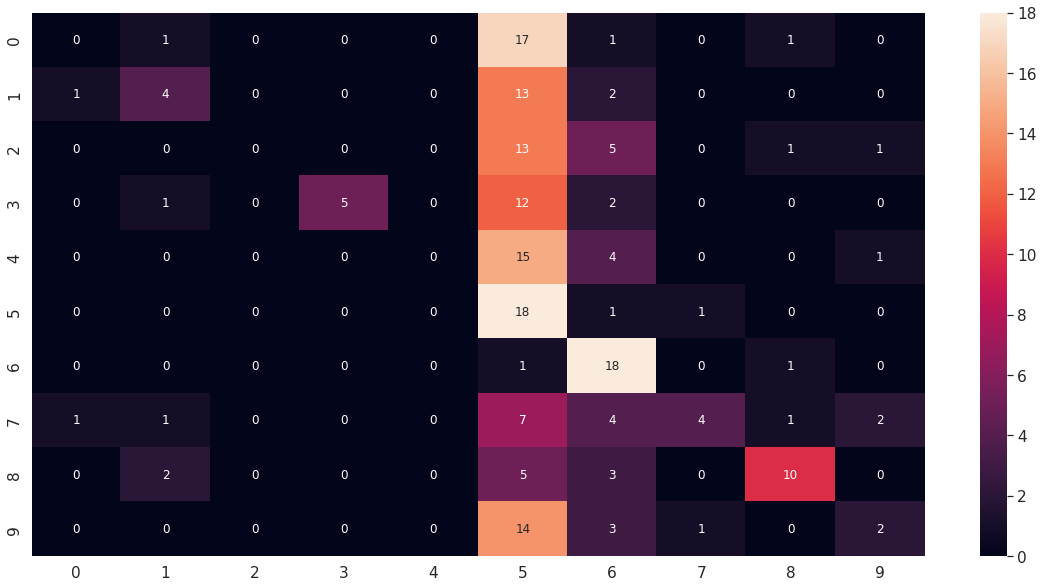

In [ ]:
# Visualizamos la matriz de confusión
facenet_model_oclu1_2_df_CM = pd.DataFrame(facenet_model_oclu1_2_CM, range(10), range(10))  
plt.figure(figsize = (20,10))  
seaborn.set(font_scale=1.4) #for label size  
seaborn.heatmap(facenet_model_oclu1_2_df_CM, annot=True, annot_kws={"size": 12}) # font size  
plt.show()  

In [ ]:
# Resumen de clasificación mask
facenet_model_oclu1_2_report = classification_report(np.argmax(testY, axis=1), predictedY, digits=4)  
print(facenet_model_oclu1_2_report)

              precision    recall  f1-score   support

           1     1.0000    0.9500    0.9744        20
           2     1.0000    0.9000    0.9474        20
           3     0.9444    0.8500    0.8947        20
           4     1.0000    0.8000    0.8889        20
           5     0.9500    0.9500    0.9500        20
           6     0.5714    1.0000    0.7273        20
           7     1.0000    0.7500    0.8571        20
           8     0.6154    0.8000    0.6957        20
           9     0.8696    1.0000    0.9302        20
          10     1.0000    0.5000    0.6667        20

    accuracy                         0.8500       200
   macro avg     0.8951    0.8500    0.8532       200
weighted avg     0.8951    0.8500    0.8532       200



In [ ]:
# Resumen de clasificación sunglasses
facenet_model_oclu1_2_report = classification_report(np.argmax(testY, axis=1), predictedY, digits=4)  
print(facenet_model_oclu1_2_report)

              precision    recall  f1-score   support

           1     0.0000    0.0000    0.0000        20
           2     0.4444    0.2000    0.2759        20
           3     0.0000    0.0000    0.0000        20
           4     1.0000    0.2500    0.4000        20
           5     0.0000    0.0000    0.0000        20
           6     0.1565    0.9000    0.2667        20
           7     0.4186    0.9000    0.5714        20
           8     0.6667    0.2000    0.3077        20
           9     0.7143    0.5000    0.5882        20
          10     0.3333    0.1000    0.1538        20

    accuracy                         0.3050       200
   macro avg     0.3734    0.3050    0.2564       200
weighted avg     0.3734    0.3050    0.2564       200



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## 1.3 Modelo con base de datos ROF 2 para condiciones de oclusion
---
Modelo 2: (BTH = 30, EHS = 80, ValidSplit = 0.2, Dropout=0, INI = HeNormal, REG = L2, OPT = adam[0.001])


In [ ]:
# Carga del modelo obtenido durante el entrenamiento, evaluación del modelo con trainX, testX y generamos las predicciones a partir del testX
load_facenet_model_oclu2_2 = load_model(path + 'data_reconocimiento1/models_ROF2/facenet_model_ROF2_2.h5')

# Evaluación del modelo
train_loss, train_acc = load_facenet_model_oclu2_2.evaluate(trainX, trainY)
test_loss, test_acc = load_facenet_model_oclu2_2.evaluate(testX, testY)

7/7 [==============================] - 0s 60ms/step - loss: 1.4668 - accuracy: 0.6150


In [ ]:
# Matriz de confusión usando Scikit Learn
predY = load_facenet_model_oclu2_2.predict(testX)  
predictedY = np.argmax(predY, axis=1)  #revisar el bias adecuado

#Creamos la matriz de confusión
facenet_model_oclu2_2_CM = confusion_matrix(np.argmax(testY, axis=1), predictedY)

7/7 [==============================] - 2s 60ms/step


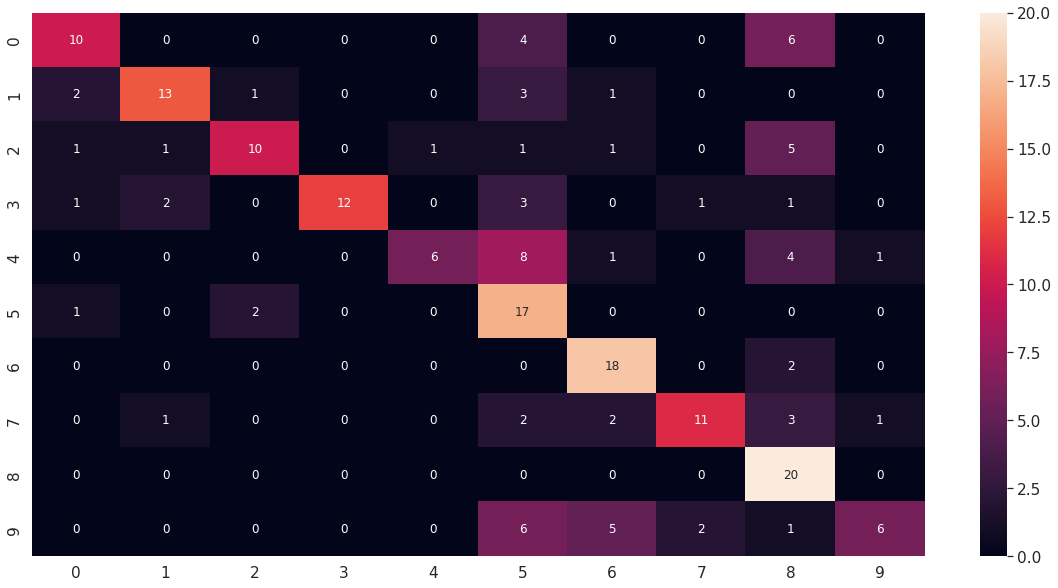

In [ ]:
# Visualizamos la matriz de confusión
facenet_model_oclu2_2_df_CM = pd.DataFrame(facenet_model_oclu2_2_CM, range(10), range(10))  
plt.figure(figsize = (20,10))  
seaborn.set(font_scale=1.4) #for label size  
seaborn.heatmap(facenet_model_oclu2_2_df_CM, annot=True, annot_kws={"size": 12}) # font size  
plt.show()  

In [ ]:
# Resumen de clasificación mask
facenet_model_oclu2_2_report = classification_report(np.argmax(testY, axis=1), predictedY, digits=4)  
print(facenet_model_oclu2_2_report)

              precision    recall  f1-score   support

           1     1.0000    0.9500    0.9744        20
           2     1.0000    0.9500    0.9744        20
           3     1.0000    1.0000    1.0000        20
           4     0.9091    1.0000    0.9524        20
           5     1.0000    1.0000    1.0000        20
           6     1.0000    1.0000    1.0000        20
           7     1.0000    1.0000    1.0000        20
           8     1.0000    1.0000    1.0000        20
           9     1.0000    1.0000    1.0000        20
          10     1.0000    1.0000    1.0000        20

    accuracy                         0.9900       200
   macro avg     0.9909    0.9900    0.9901       200
weighted avg     0.9909    0.9900    0.9901       200



In [ ]:
# Resumen de clasificación sunglasses
facenet_model_oclu2_2_report = classification_report(np.argmax(testY, axis=1), predictedY, digits=4)  
print(facenet_model_oclu2_2_report)

              precision    recall  f1-score   support

           1     0.6667    0.5000    0.5714        20
           2     0.7647    0.6500    0.7027        20
           3     0.7692    0.5000    0.6061        20
           4     1.0000    0.6000    0.7500        20
           5     0.8571    0.3000    0.4444        20
           6     0.3864    0.8500    0.5312        20
           7     0.6429    0.9000    0.7500        20
           8     0.7857    0.5500    0.6471        20
           9     0.4762    1.0000    0.6452        20
          10     0.7500    0.3000    0.4286        20

    accuracy                         0.6150       200
   macro avg     0.7099    0.6150    0.6077       200
weighted avg     0.7099    0.6150    0.6077       200



## 1.4 Model con base de datos VGG-African para condiciones de etnia
---
Modelo 12: (BTH = 40, EHS = 60, ValidSplit = 0.2, Dropout = 0.2, INI = HeNoraml, REG = L2, OPT = adam[0.001])


In [ ]:
# Carga del modelo obtenido durante el entrenamiento, evaluación del modelo con trainX, testX y generamos las predicciones a partir del testX
load_facenet_model_vgg1_12 = load_model(path + 'data_reconocimiento1/models_VGG1/facenet_model_VGG1_12.h5')

# Evaluación del modelo
train_loss, train_acc = load_facenet_model_vgg1_12.evaluate(trainX, trainY)
test_loss, test_acc = load_facenet_model_vgg1_12.evaluate(testX, testY)

32/32 [==============================] - 2s 65ms/step - loss: 0.2832 - accuracy: 0.9550


In [ ]:
# Matriz de confusión usando Scikit Learn
predY = load_facenet_model_vgg1_12.predict(testX)  
predictedY = np.argmax(predY, axis=1)  #revisar el bias adecuado

#Creamos la matriz de confusión
facenet_model_vgg1_12_CM = confusion_matrix(np.argmax(testY, axis=1), predictedY)

32/32 [==============================] - 3s 52ms/step


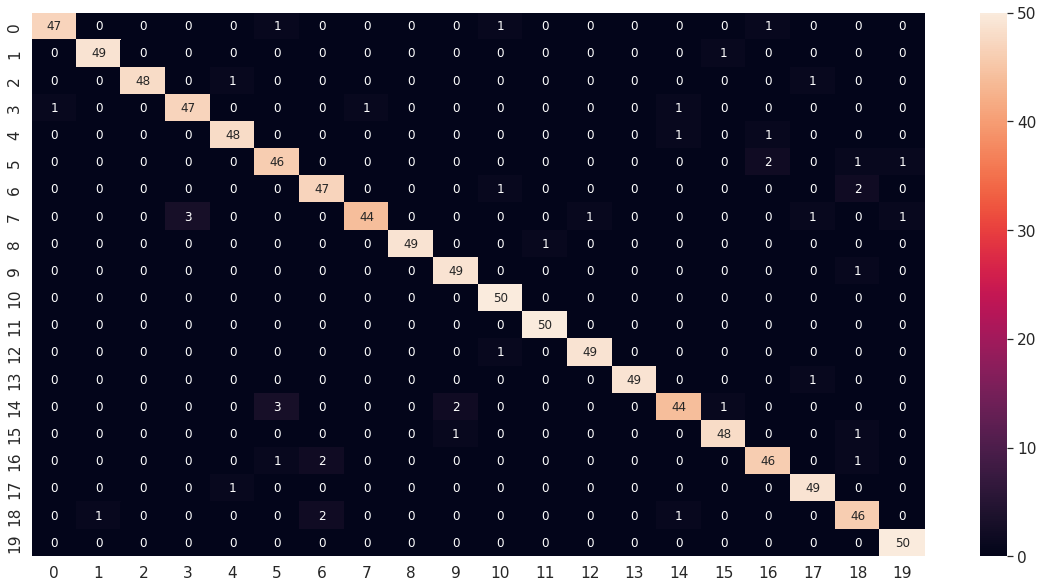

In [ ]:
# Visualizamos la matriz de confusión
facenet_model_vgg1_12_df_CM = pd.DataFrame(facenet_model_vgg1_12_CM, range(20), range(20))  
plt.figure(figsize = (20,10))  
seaborn.set(font_scale=1.4) #for label size  
seaborn.heatmap(facenet_model_vgg1_12_df_CM, annot=True, annot_kws={"size": 12}) # font size  
plt.show()  

In [ ]:
# Resumen de clasificación
facenet_model_vgg1_12_report = classification_report(np.argmax(testY, axis=1), predictedY, digits=4)  
print(facenet_model_vgg1_12_report)

              precision    recall  f1-score   support

           1     0.9792    0.9400    0.9592        50
           2     0.9800    0.9800    0.9800        50
           3     1.0000    0.9600    0.9796        50
           4     0.9400    0.9400    0.9400        50
           5     0.9600    0.9600    0.9600        50
           6     0.9020    0.9200    0.9109        50
           7     0.9216    0.9400    0.9307        50
           8     0.9778    0.8800    0.9263        50
           9     1.0000    0.9800    0.9899        50
          10     0.9423    0.9800    0.9608        50
          11     0.9434    1.0000    0.9709        50
          12     0.9804    1.0000    0.9901        50
          13     0.9800    0.9800    0.9800        50
          14     1.0000    0.9800    0.9899        50
          15     0.9362    0.8800    0.9072        50
          16     0.9600    0.9600    0.9600        50
          17     0.9200    0.9200    0.9200        50
          18     0.9423    

## 1.5 Model con base de datos VGG-Asian para condiciones de etnia
---
Modelo 2: (BTH = 30, EHS = 80, ValidSplit = 0.2, Dropout=0, INI = HeNormal, REG = L2, OPT = adam[0.001])


In [ ]:
# Carga del modelo obtenido durante el entrenamiento, evaluación del modelo con trainX, testX y generamos las predicciones a partir del testX
load_facenet_model_vgg2_2 = load_model(path + 'data_reconocimiento1/models_VGG2/facenet_model_VGG2_2.h5')

# Evaluación del modelo
train_loss, train_acc = load_facenet_model_vgg2_2.evaluate(trainX, trainY)
test_loss, test_acc = load_facenet_model_vgg2_2.evaluate(testX, testY)

32/32 [==============================] - 2s 66ms/step - loss: 0.3827 - accuracy: 0.9190


In [ ]:
# Matriz de confusión usando Scikit Learn
predY = load_facenet_model_vgg2_2.predict(testX)  
predictedY = np.argmax(predY, axis=1)  #revisar el bias adecuado

#Creamos la matriz de confusión
facenet_model_vgg2_2_CM = confusion_matrix(np.argmax(testY, axis=1), predictedY)

32/32 [==============================] - 3s 49ms/step


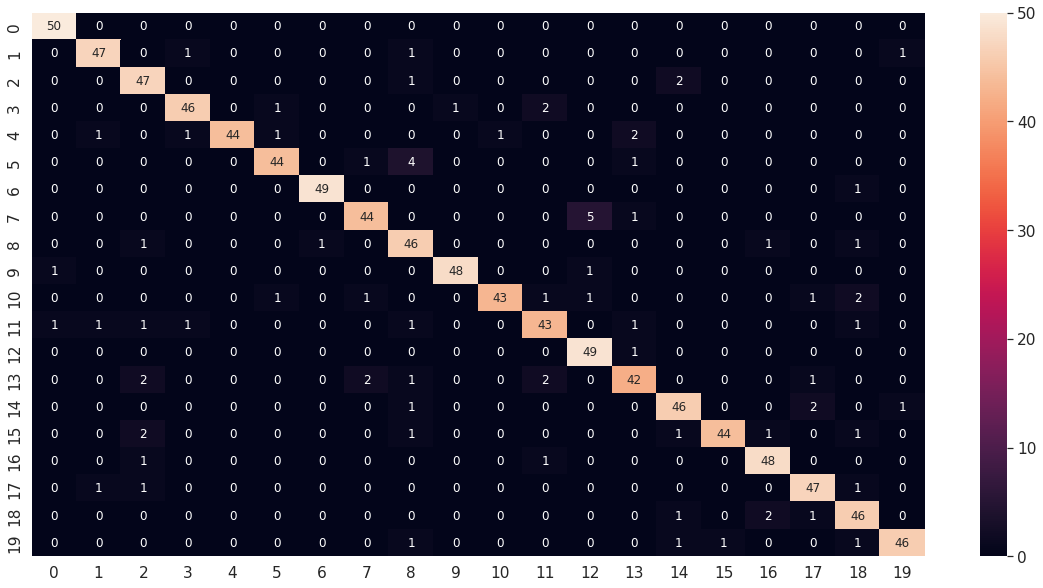

In [ ]:
# Visualizamos la matriz de confusión
facenet_model_vgg2_2_df_CM = pd.DataFrame(facenet_model_vgg2_2_CM, range(20), range(20))  
plt.figure(figsize = (20,10))  
seaborn.set(font_scale=1.4) #for label size  
seaborn.heatmap(facenet_model_vgg2_2_df_CM, annot=True, annot_kws={"size": 12}) # font size  
plt.show()  

In [ ]:
# Resumen de clasificación
facenet_model_vgg2_2_report = classification_report(np.argmax(testY, axis=1), predictedY, digits=4)  
print(facenet_model_vgg2_2_report)

              precision    recall  f1-score   support

           1     0.9615    1.0000    0.9804        50
           2     0.9400    0.9400    0.9400        50
           3     0.8545    0.9400    0.8952        50
           4     0.9388    0.9200    0.9293        50
           5     1.0000    0.8800    0.9362        50
           6     0.9362    0.8800    0.9072        50
           7     0.9800    0.9800    0.9800        50
           8     0.9167    0.8800    0.8980        50
           9     0.8070    0.9200    0.8598        50
          10     0.9796    0.9600    0.9697        50
          11     0.9773    0.8600    0.9149        50
          12     0.8776    0.8600    0.8687        50
          13     0.8750    0.9800    0.9245        50
          14     0.8750    0.8400    0.8571        50
          15     0.9020    0.9200    0.9109        50
          16     0.9778    0.8800    0.9263        50
          17     0.9231    0.9600    0.9412        50
          18     0.9038    

## 1.6 Model con base de datos VGG-Latin para condiciones de etnia
---
Modelo 2: (BTH = 30, EHS = 80, ValidSplit = 0.2, Dropout=0, INI = HeNormal, REG = L2, OPT = adam[0.001])


In [ ]:
# Carga del modelo obtenido durante el entrenamiento, evaluación del modelo con trainX, testX y generamos las predicciones a partir del testX
load_facenet_model_vgg3_2 = load_model(path + 'data_reconocimiento1/models_VGG3/facenet_model_VGG3_2.h5')

# Evaluación del modelo
train_loss, train_acc = load_facenet_model_vgg3_2.evaluate(trainX, trainY)
test_loss, test_acc = load_facenet_model_vgg3_2.evaluate(testX, testY)

32/32 [==============================] - 2s 54ms/step - loss: 0.1854 - accuracy: 0.9770


In [ ]:
# Matriz de confusión usando Scikit Learn
predY = load_facenet_model_vgg3_2.predict(testX)  
predictedY = np.argmax(predY, axis=1)  #revisar el bias adecuado

#Creamos la matriz de confusión
facenet_model_vgg3_2_CM = confusion_matrix(np.argmax(testY, axis=1), predictedY)

32/32 [==============================] - 3s 50ms/step


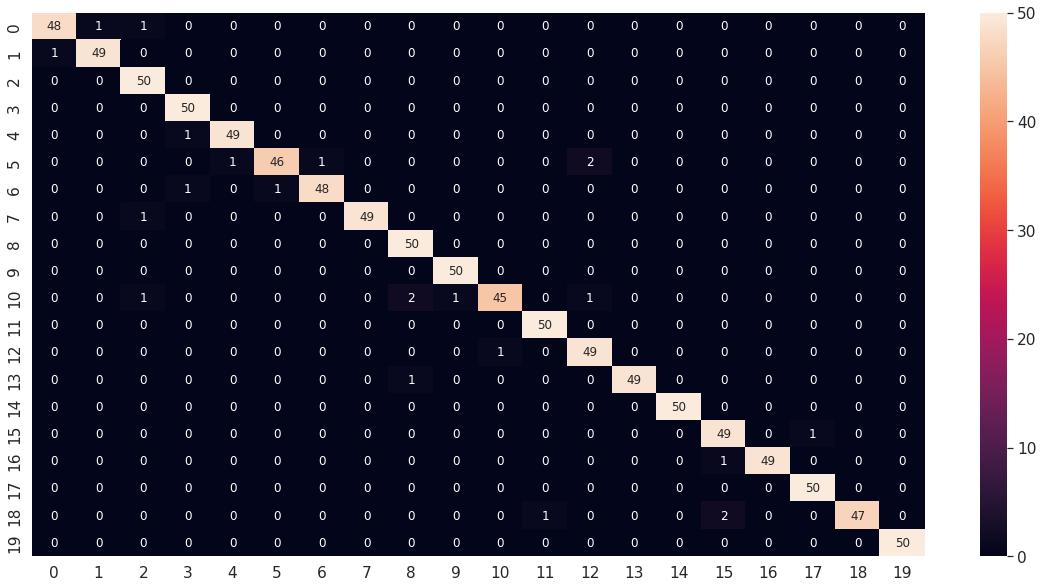

In [ ]:
# Visualizamos la matriz de confusión
facenet_model_vgg3_2_df_CM = pd.DataFrame(facenet_model_vgg3_2_CM, range(20), range(20))  
plt.figure(figsize = (20,10))  
seaborn.set(font_scale=1.4) #for label size  
seaborn.heatmap(facenet_model_vgg3_2_df_CM, annot=True, annot_kws={"size": 12}) # font size  
plt.show()  

In [ ]:
# Resumen de clasificación
facenet_model_vgg3_2_report = classification_report(np.argmax(testY, axis=1), predictedY, digits=4)  
print(facenet_model_vgg3_2_report)

              precision    recall  f1-score   support

           1     0.9796    0.9600    0.9697        50
           2     0.9800    0.9800    0.9800        50
           3     0.9434    1.0000    0.9709        50
           4     0.9615    1.0000    0.9804        50
           5     0.9800    0.9800    0.9800        50
           6     0.9787    0.9200    0.9485        50
           7     0.9796    0.9600    0.9697        50
           8     1.0000    0.9800    0.9899        50
           9     0.9434    1.0000    0.9709        50
          10     0.9804    1.0000    0.9901        50
          11     0.9783    0.9000    0.9375        50
          12     0.9804    1.0000    0.9901        50
          13     0.9423    0.9800    0.9608        50
          14     1.0000    0.9800    0.9899        50
          15     1.0000    1.0000    1.0000        50
          16     0.9423    0.9800    0.9608        50
          17     1.0000    0.9800    0.9899        50
          18     0.9804    

## 1.7 Model con base de datos VGG-Indian para condiciones de etnia
---
Modelo 8: (BTH = 20, EHS = 60, ValidSplit = 0.2, Dropout = , INI = HeNormal, REG = L2, OPT = adam[0.001])


In [ ]:
# Carga del modelo obtenido durante el entrenamiento, evaluación del modelo con trainX, testX y generamos las predicciones a partir del testX
load_facenet_model_vgg4_8 = load_model(path + 'data_reconocimiento1/models_VGG4/facenet_model_VGG4_8.h5')

# Evaluación del modelo
train_loss, train_acc = load_facenet_model_vgg4_8.evaluate(trainX, trainY)
test_loss, test_acc = load_facenet_model_vgg4_8.evaluate(testX, testY)

32/32 [==============================] - 2s 51ms/step - loss: 0.2318 - accuracy: 0.9660


In [ ]:
# Matriz de confusión usando Scikit Learn
predY = load_facenet_model_vgg4_8.predict(testX)  
predictedY = np.argmax(predY, axis=1)  #revisar el bias adecuado

#Creamos la matriz de confusión
facenet_model_vgg4_8_CM = confusion_matrix(np.argmax(testY, axis=1), predictedY)

32/32 [==============================] - 3s 49ms/step


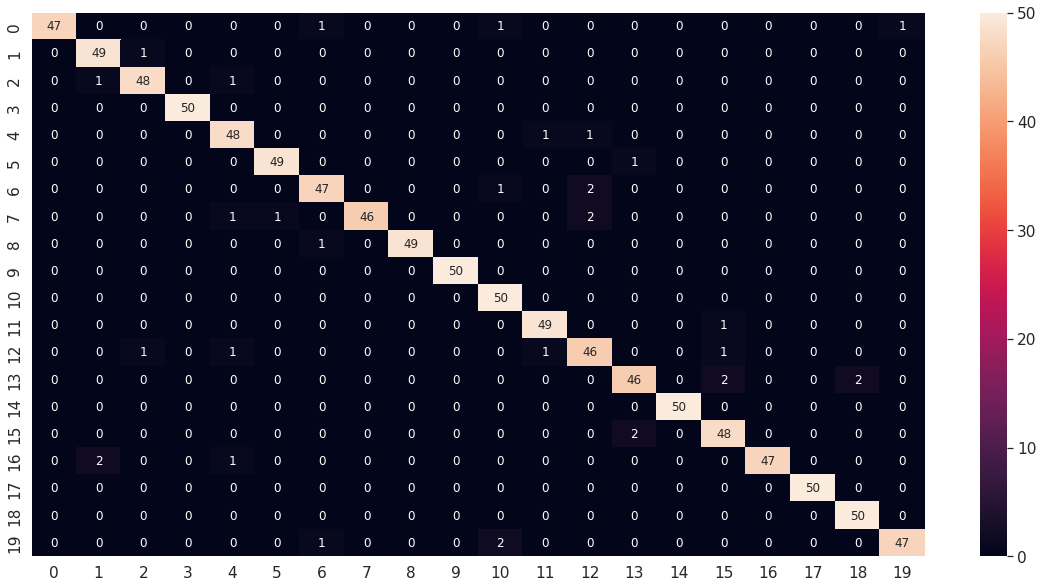

In [ ]:
# Visualizamos la matriz de confusión
facenet_model_vgg4_8_df_CM = pd.DataFrame(facenet_model_vgg4_8_CM, range(20), range(20))  
plt.figure(figsize = (20,10))  
seaborn.set(font_scale=1.4) #for label size  
seaborn.heatmap(facenet_model_vgg4_8_df_CM, annot=True, annot_kws={"size": 12}) # font size  
plt.show()  

In [ ]:
# Resumen de clasificación
facenet_model_vgg4_8_report = classification_report(np.argmax(testY, axis=1), predictedY, digits=4)  
print(facenet_model_vgg4_8_report)

              precision    recall  f1-score   support

           1     1.0000    0.9400    0.9691        50
           2     0.9423    0.9800    0.9608        50
           3     0.9600    0.9600    0.9600        50
           4     1.0000    1.0000    1.0000        50
           5     0.9231    0.9600    0.9412        50
           6     0.9800    0.9800    0.9800        50
           7     0.9400    0.9400    0.9400        50
           8     1.0000    0.9200    0.9583        50
           9     1.0000    0.9800    0.9899        50
          10     1.0000    1.0000    1.0000        50
          11     0.9259    1.0000    0.9615        50
          12     0.9608    0.9800    0.9703        50
          13     0.9020    0.9200    0.9109        50
          14     0.9388    0.9200    0.9293        50
          15     1.0000    1.0000    1.0000        50
          16     0.9231    0.9600    0.9412        50
          17     1.0000    0.9400    0.9691        50
          18     1.0000    

# 2. Modelo de Deep Learning: DeepFace

In [ ]:
# Carga del conjunto de datos comprimido
data = load(path + 'data_reconocimiento2/faces-dataset-ROF2_sunglasses.npz')
trainX, trainY, testX, testY = data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3']
print('Tamaño de data train:', trainX.shape)
print('Tamaño de data test:', testX.shape)

Tamaño de data train: (1601, 152, 152, 3)
Tamaño de data test: (200, 152, 152, 3)


In [ ]:
# Estandarización de los datos de entrenamiento y test
trainX = trainX/255
testX = testX/255
trainY = to_categorical(trainY)
testY = to_categorical(testY)
random.seed(10)

Sujeto #[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


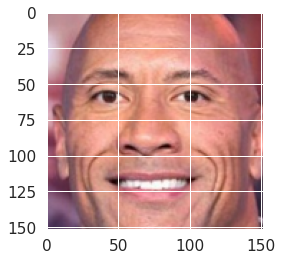

In [ ]:
# Ejemplo
print('Sujeto #{}'.format(trainY[20]))
plt.imshow(trainX[20])

## 2.1 Model con base de datos Yale para condiciones de iluminación
---
Modelo 4: (BTH = 30, EHS = 30, ValidSplit = 0.2, INI = HeNormal, Dropout=0 REG = L2 none, OPT = adamax[0.001])


In [ ]:
# Carga del modelo obtenido durante el entrenamiento, evaluación del modelo con trainX, testX y generamos las predicciones a partir del testX
load_deepface_model_yale4 = load_model(path + 'data_reconocimiento2/models_YALE1/deepface_model_yale1_4.h5')

# Evaluación del modelo
train_loss, train_acc = load_deepface_model_yale4.evaluate(trainX, trainY)
test_loss, test_acc = load_deepface_model_yale4.evaluate(testX, testY)

18/18 [==============================] - 2s 84ms/step - loss: 0.1811 - accuracy: 0.9860


In [ ]:
# Matriz de confusión usando Scikit Learn
predY = load_deepface_model_yale4.predict(testX)  
predictedY = np.argmax(predY, axis=1)  #revisar el bias adecuado

#Creamos la matriz de confusión
deepface_model_yale4_CM = confusion_matrix(np.argmax(testY, axis=1), predictedY)

18/18 [==============================] - 37s 66ms/step


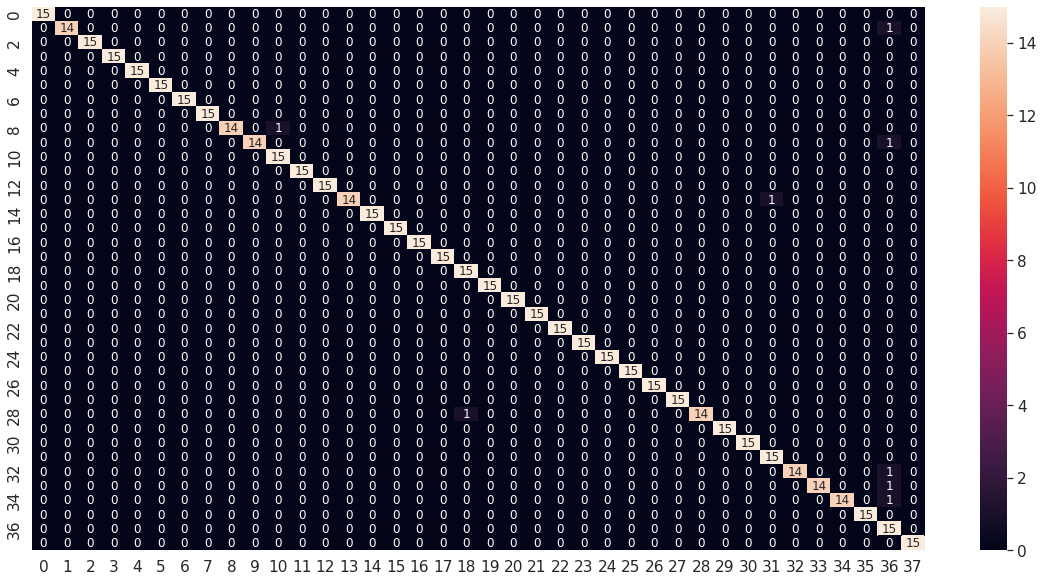

In [ ]:
# Visualizamos la matriz de confusión
deepface_model_yale4_df_CM = pd.DataFrame(deepface_model_yale4_CM, range(38), range(38))  
plt.figure(figsize = (20,10))  
seaborn.set(font_scale=1.4) #for label size  
seaborn.heatmap(deepface_model_yale4_df_CM, annot=True, annot_kws={"size": 12}) # font size  
plt.show()  

In [ ]:
# Resumen de clasificación
deepface_model_yale4_report = classification_report(np.argmax(testY, axis=1), predictedY, digits=4)  
print(deepface_model_yale4_report)

              precision    recall  f1-score   support

           1     1.0000    1.0000    1.0000        15
           2     1.0000    0.9333    0.9655        15
           3     1.0000    1.0000    1.0000        15
           4     1.0000    1.0000    1.0000        15
           5     1.0000    1.0000    1.0000        15
           6     1.0000    1.0000    1.0000        15
           7     1.0000    1.0000    1.0000        15
           8     1.0000    1.0000    1.0000        15
           9     1.0000    0.9333    0.9655        15
          10     1.0000    0.9333    0.9655        15
          11     0.9375    1.0000    0.9677        15
          12     1.0000    1.0000    1.0000        15
          13     1.0000    1.0000    1.0000        15
          15     1.0000    0.9333    0.9655        15
          16     1.0000    1.0000    1.0000        15
          17     1.0000    1.0000    1.0000        15
          18     1.0000    1.0000    1.0000        15
          19     1.0000    

## 2.2 Model con base de datos ROF1 para condiciones de oclusión
---
Modelo 8: (BTH = 30, EHS = 30, ValidSplit = 0.2, INI = HeNormal, Dropout=0 REG = none, OPT = adamax[0.001])



In [ ]:
# Carga del modelo obtenido durante el entrenamiento, evaluación del modelo con trainX, testX y generamos las predicciones a partir del testX
load_deepface_model_rof1_8 = load_model(path + 'data_reconocimiento2/models_ROF1/deepface_model_ROF1_8.h5')

# Evaluación del modelo
train_loss, train_acc = load_deepface_model_rof1_8.evaluate(trainX, trainY)
test_loss, test_acc = load_deepface_model_rof1_8.evaluate(testX, testY)

7/7 [==============================] - 0s 68ms/step - loss: 9.7165 - accuracy: 0.2500


In [ ]:
# Matriz de confusión usando Scikit Learn
predY = load_deepface_model_rof1_8.predict(testX)  
predictedY = np.argmax(predY, axis=1)  #revisar el bias adecuado

#Creamos la matriz de confusión
deepface_model_rof1_8_CM = confusion_matrix(np.argmax(testY, axis=1), predictedY)

7/7 [==============================] - 36s 68ms/step


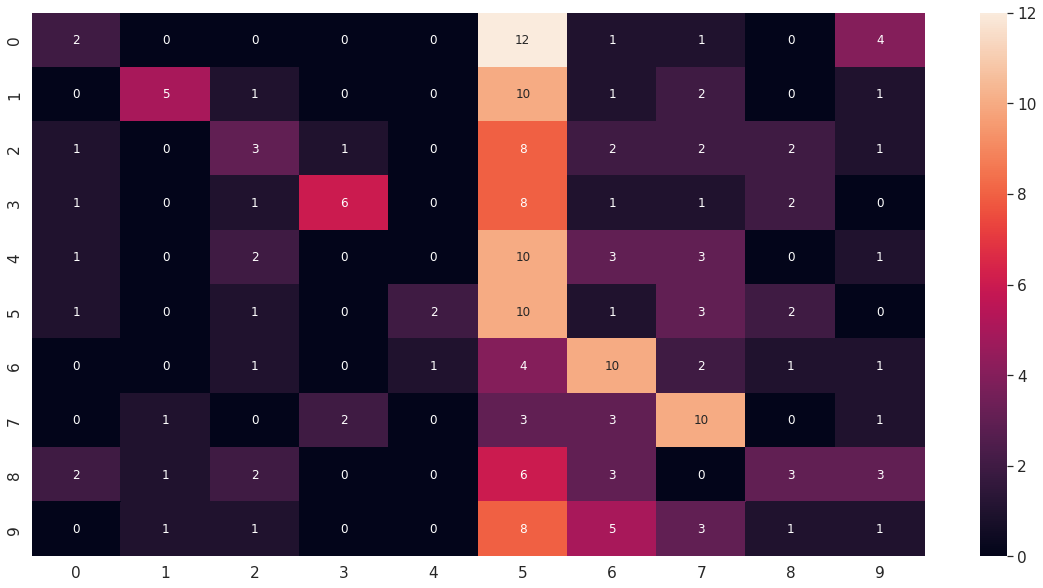

In [ ]:
# Visualizamos la matriz de confusión
deepface_model_rof1_8_df_CM = pd.DataFrame(deepface_model_rof1_8_CM, range(10), range(10))  
plt.figure(figsize = (20,10))  
seaborn.set(font_scale=1.4) #for label size  
seaborn.heatmap(deepface_model_rof1_8_df_CM, annot=True, annot_kws={"size": 12}) # font size  
plt.show()  

In [ ]:
# Resumen de clasificación mask
deepface_model_rof1_8_report = classification_report(np.argmax(testY, axis=1), predictedY, digits=4)  
print(deepface_model_rof1_8_report)

              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000         0
           1     0.7857    0.5500    0.6471        20
           2     0.6429    0.4500    0.5294        20
           3     0.7500    0.3000    0.4286        20
           4     0.5625    0.4500    0.5000        20
           5     0.7368    0.7000    0.7179        20
           6     0.7619    0.8000    0.7805        20
           7     0.4318    0.9500    0.5938        20
           8     0.4348    0.5000    0.4651        20
           9     0.7200    0.9000    0.8000        20
          10     0.8000    0.6000    0.6857        20

    accuracy                         0.6200       200
   macro avg     0.6024    0.5636    0.5589       200
weighted avg     0.6626    0.6200    0.6148       200



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Resumen de clasificación sunglasses
deepface_model_rof1_8_report = classification_report(np.argmax(testY, axis=1), predictedY, digits=4)  
print(deepface_model_rof1_8_report)

              precision    recall  f1-score   support

           1     0.2500    0.1000    0.1429        20
           2     0.6250    0.2500    0.3571        20
           3     0.2500    0.1500    0.1875        20
           4     0.6667    0.3000    0.4138        20
           5     0.0000    0.0000    0.0000        20
           6     0.1266    0.5000    0.2020        20
           7     0.3333    0.5000    0.4000        20
           8     0.3704    0.5000    0.4255        20
           9     0.2727    0.1500    0.1935        20
          10     0.0769    0.0500    0.0606        20

    accuracy                         0.2500       200
   macro avg     0.2972    0.2500    0.2383       200
weighted avg     0.2972    0.2500    0.2383       200



## 2.3 Model con base de datos ROF2 para condiciones de oclusión
---
Modelo 8: (BTH = 10, EHS = 30, ValidSplit = 0.2, INI = HeNormal, Dropout=0 REG = none, OPT = adamax[0.001])


In [ ]:
# Carga del modelo obtenido durante el entrenamiento, evaluación del modelo con trainX, testX y generamos las predicciones a partir del testX
load_deepface_model_rof2_8 = load_model(path + 'data_reconocimiento2/models_ROF2/deepface_model_ROF2_8.h5')

# Evaluación del modelo
train_loss, train_acc = load_deepface_model_rof2_8.evaluate(trainX, trainY)
test_loss, test_acc = load_deepface_model_rof2_8.evaluate(testX, testY)

7/7 [==============================] - 1s 70ms/step - loss: 5.6393 - accuracy: 0.3950


In [ ]:
# Matriz de confusión usando Scikit Learn
predY = load_deepface_model_rof2_8.predict(testX)  
predictedY = np.argmax(predY, axis=1)  #revisar el bias adecuado

#Creamos la matriz de confusión
deepface_model_rof2_8_CM = confusion_matrix(np.argmax(testY, axis=1), predictedY)

7/7 [==============================] - 36s 69ms/step


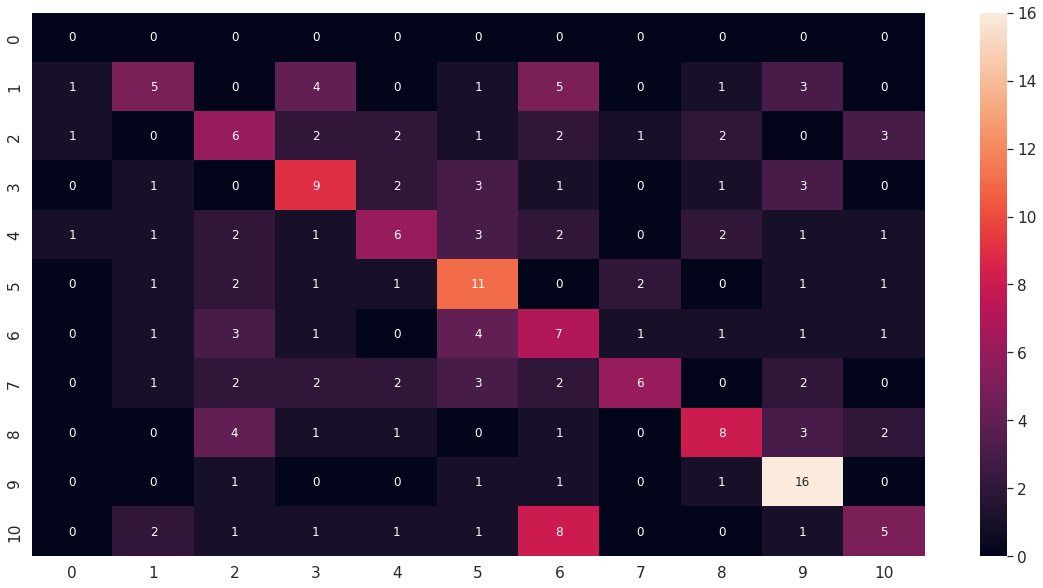

In [ ]:
# Visualizamos la matriz de confusión
deepface_model_rof2_8_df_CM = pd.DataFrame(deepface_model_rof2_8_CM, range(11), range(11))  
plt.figure(figsize = (20,10))  
seaborn.set(font_scale=1.4) #for label size  
seaborn.heatmap(deepface_model_rof2_8_df_CM, annot=True, annot_kws={"size": 12}) # font size  
plt.show()  

In [ ]:
# Resumen de clasificación mask
deepface_model_rof2_8_report = classification_report(np.argmax(testY, axis=1), predictedY, digits=4)  
print(deepface_model_rof2_8_report)

              precision    recall  f1-score   support

           1     0.7826    0.9000    0.8372        20
           2     0.9500    0.9500    0.9500        20
           3     0.7273    0.4000    0.5161        20
           4     0.5625    0.4500    0.5000        20
           5     0.5152    0.8500    0.6415        20
           6     0.8000    1.0000    0.8889        20
           7     1.0000    0.9500    0.9744        20
           8     0.8889    0.4000    0.5517        20
           9     0.7500    0.9000    0.8182        20
          10     0.7500    0.7500    0.7500        20

    accuracy                         0.7550       200
   macro avg     0.7726    0.7550    0.7428       200
weighted avg     0.7726    0.7550    0.7428       200



In [ ]:
# Resumen de clasificación sunglasses
deepface_model_rof2_8_report = classification_report(np.argmax(testY, axis=1), predictedY, digits=4)  
print(deepface_model_rof2_8_report)

              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000         0
           1     0.4167    0.2500    0.3125        20
           2     0.2857    0.3000    0.2927        20
           3     0.4091    0.4500    0.4286        20
           4     0.4000    0.3000    0.3429        20
           5     0.3929    0.5500    0.4583        20
           6     0.2414    0.3500    0.2857        20
           7     0.6000    0.3000    0.4000        20
           8     0.5000    0.4000    0.4444        20
           9     0.5161    0.8000    0.6275        20
          10     0.3846    0.2500    0.3030        20

    accuracy                         0.3950       200
   macro avg     0.3770    0.3591    0.3541       200
weighted avg     0.4146    0.3950    0.3896       200



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## 2.4 Model con base de datos VGG-African para condiciones de etnia
---
Modelo 2: (BTH = 20, EHS = 60, ValidSplit = 0.2, Dropout=0.5, INI = HeNormal, REG = L2, OPT = SGD[0.001, momentum=0.9])


In [ ]:
# Carga del modelo obtenido durante el entrenamiento, evaluación del modelo con trainX, testX y generamos las predicciones a partir del testX
load_deepface_model_vgg1_2 = load_model(path + 'data_reconocimiento2/models_VGG1/deepface_model_VGG1_2.h5')

# Evaluación del modelo
train_loss, train_acc = load_deepface_model_vgg1_2.evaluate(trainX, trainY)
test_loss, test_acc = load_deepface_model_vgg1_2.evaluate(testX, testY)

32/32 [==============================] - 2s 70ms/step - loss: 0.2903 - accuracy: 0.9350


In [ ]:
# Matriz de confusión usando Scikit Learn
predY = load_deepface_model_vgg1_2.predict(testX)  
predictedY = np.argmax(predY, axis=1)  #revisar el bias adecuado

#Creamos la matriz de confusión
deepface_model_vgg1_2_CM = confusion_matrix(np.argmax(testY, axis=1), predictedY)

32/32 [==============================] - 50s 64ms/step


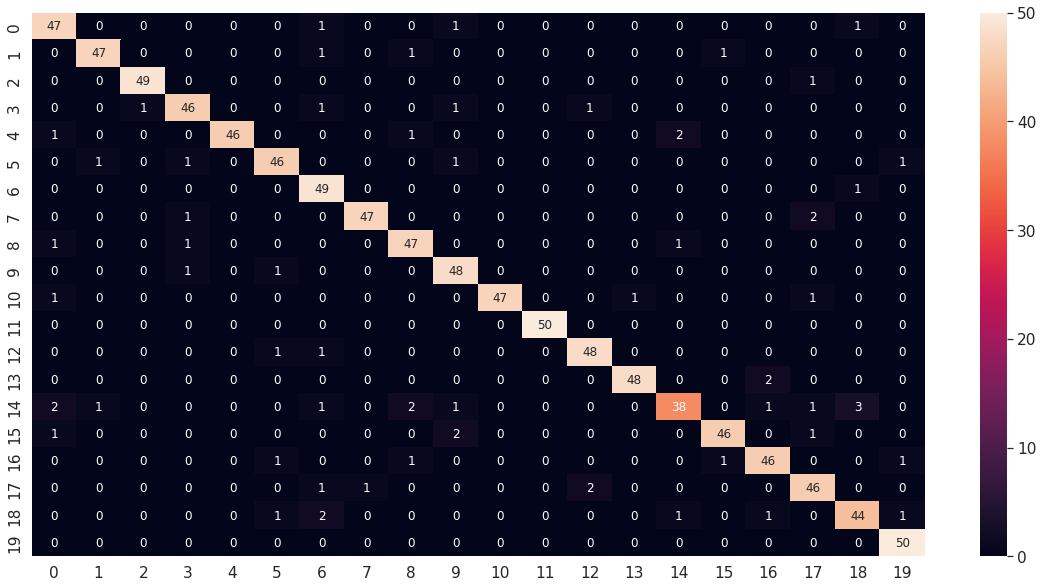

In [ ]:
# Visualizamos la matriz de confusión
deepface_model_vgg1_2_df_CM = pd.DataFrame(deepface_model_vgg1_2_CM, range(20), range(20))  
plt.figure(figsize = (20,10))  
seaborn.set(font_scale=1.4) #for label size  
seaborn.heatmap(deepface_model_vgg1_2_df_CM, annot=True, annot_kws={"size": 12}) # font size  
plt.show()  

In [ ]:
# Resumen de clasificación
deepface_model_vgg1_2_report = classification_report(np.argmax(testY, axis=1), predictedY, digits=4)  
print(deepface_model_vgg1_2_report)

              precision    recall  f1-score   support

           1     0.8868    0.9400    0.9126        50
           2     0.9592    0.9400    0.9495        50
           3     0.9800    0.9800    0.9800        50
           4     0.9200    0.9200    0.9200        50
           5     1.0000    0.9200    0.9583        50
           6     0.9200    0.9200    0.9200        50
           7     0.8596    0.9800    0.9159        50
           8     0.9792    0.9400    0.9592        50
           9     0.9038    0.9400    0.9216        50
          10     0.8889    0.9600    0.9231        50
          11     1.0000    0.9400    0.9691        50
          12     1.0000    1.0000    1.0000        50
          13     0.9412    0.9600    0.9505        50
          14     0.9796    0.9600    0.9697        50
          15     0.9048    0.7600    0.8261        50
          16     0.9583    0.9200    0.9388        50
          17     0.9200    0.9200    0.9200        50
          18     0.8846    

## 2.5 Model con base de datos VGG-Asian para condiciones de etnia
---
Modelo 17: (BTH = 20, EHS = 200, ValidSplit = 0.2, INI = HeNormal, Dropout=0 REG = L2, OPT =  SGD[0.001, momentum=0.9])


In [ ]:
# Carga del modelo obtenido durante el entrenamiento, evaluación del modelo con trainX, testX y generamos las predicciones a partir del testX
load_deepface_model_vgg2_17 = load_model(path + 'data_reconocimiento2/models_VGG2/deepface_model_VGG2_17.h5')

# Evaluación del modelo
train_loss, train_acc = load_deepface_model_vgg2_17.evaluate(trainX, trainY)
test_loss, test_acc = load_deepface_model_vgg2_17.evaluate(testX, testY)

32/32 [==============================] - 2s 72ms/step - loss: 0.4752 - accuracy: 0.8650


In [ ]:
# Matriz de confusión usando Scikit Learn
predY = load_deepface_model_vgg2_17.predict(testX)  
predictedY = np.argmax(predY, axis=1)  #revisar el bias adecuado

#Creamos la matriz de confusión
deepface_model_vgg2_17_CM = confusion_matrix(np.argmax(testY, axis=1), predictedY)

32/32 [==============================] - 40s 66ms/step


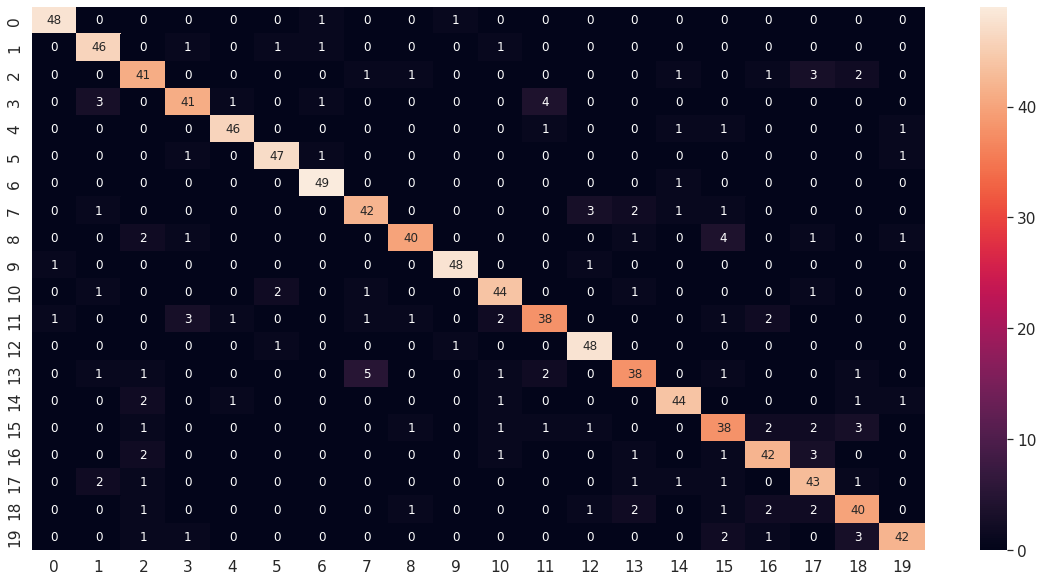

In [ ]:
# Visualizamos la matriz de confusión
deepface_model_vgg2_17_df_CM = pd.DataFrame(deepface_model_vgg2_17_CM, range(20), range(20))  
plt.figure(figsize = (20,10))  
seaborn.set(font_scale=1.4) #for label size  
seaborn.heatmap(deepface_model_vgg2_17_df_CM, annot=True, annot_kws={"size": 12}) # font size  
plt.show()  

In [ ]:
# Resumen de clasificación
deepface_model_vgg2_17_report = classification_report(np.argmax(testY, axis=1), predictedY, digits=4)  
print(deepface_model_vgg2_17_report)

              precision    recall  f1-score   support

           1     0.9600    0.9600    0.9600        50
           2     0.8519    0.9200    0.8846        50
           3     0.7885    0.8200    0.8039        50
           4     0.8542    0.8200    0.8367        50
           5     0.9388    0.9200    0.9293        50
           6     0.9216    0.9400    0.9307        50
           7     0.9245    0.9800    0.9515        50
           8     0.8400    0.8400    0.8400        50
           9     0.9091    0.8000    0.8511        50
          10     0.9600    0.9600    0.9600        50
          11     0.8627    0.8800    0.8713        50
          12     0.8261    0.7600    0.7917        50
          13     0.8889    0.9600    0.9231        50
          14     0.8261    0.7600    0.7917        50
          15     0.8980    0.8800    0.8889        50
          16     0.7451    0.7600    0.7525        50
          17     0.8400    0.8400    0.8400        50
          18     0.7818    

## 2.6 Model con base de datos VGG-Latin para condiciones de etnia
---
Modelo 11: (BTH = 10, EHS = 50, ValidSplit = 0.2, INI = HeNormal, Dropout=0 REG = L2 none, OPT =  SGD[0.001, momentum=0.9])



In [ ]:
# Carga del modelo obtenido durante el entrenamiento, evaluación del modelo con trainX, testX y generamos las predicciones a partir del testX
load_deepface_model_vgg3_11 = load_model(path + 'data_reconocimiento2/models_VGG3/deepface_model_VGG3_11.h5')

# Evaluación del modelo
train_loss, train_acc = load_deepface_model_vgg3_11.evaluate(trainX, trainY)
test_loss, test_acc = load_deepface_model_vgg3_11.evaluate(testX, testY)

32/32 [==============================] - 2s 68ms/step - loss: 0.2059 - accuracy: 0.9450


In [ ]:
# Matriz de confusión usando Scikit Learn
predY = load_deepface_model_vgg3_11.predict(testX)  
predictedY = np.argmax(predY, axis=1)  #revisar el bias adecuado

#Creamos la matriz de confusión
deepface_model_vgg3_11_CM = confusion_matrix(np.argmax(testY, axis=1), predictedY)

32/32 [==============================] - 37s 82ms/step


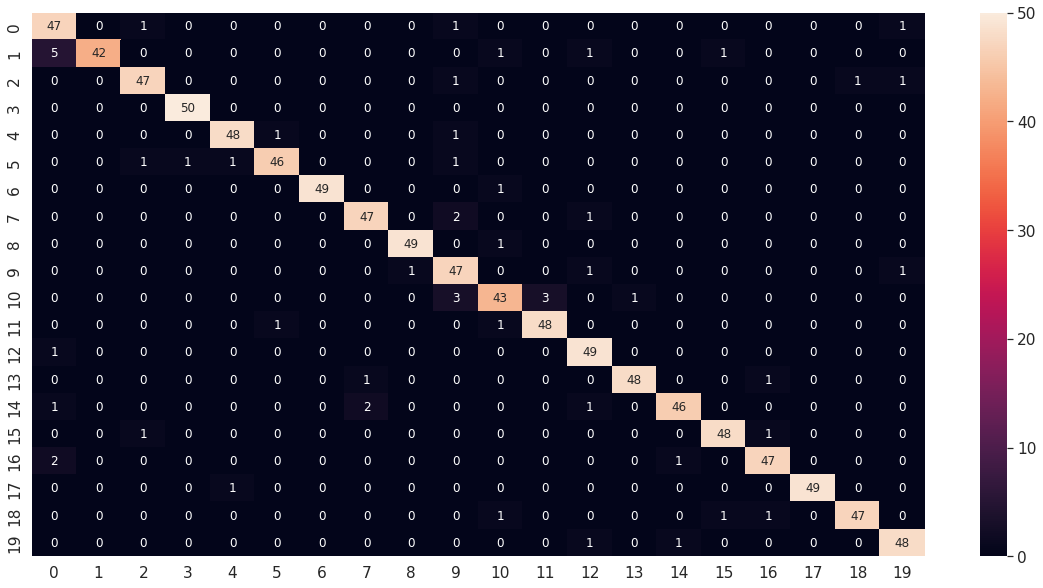

In [ ]:
# Visualizamos la matriz de confusión
deepface_model_vgg3_11_df_CM = pd.DataFrame(deepface_model_vgg3_11_CM, range(20), range(20))  
plt.figure(figsize = (20,10))  
seaborn.set(font_scale=1.4) #for label size  
seaborn.heatmap(deepface_model_vgg3_11_df_CM, annot=True, annot_kws={"size": 12}) # font size  
plt.show()  

In [ ]:
# Resumen de clasificación
deepface_model_vgg3_11_report = classification_report(np.argmax(testY, axis=1), predictedY, digits=4)  
print(deepface_model_vgg3_11_report)

              precision    recall  f1-score   support

           1     0.8393    0.9400    0.8868        50
           2     1.0000    0.8400    0.9130        50
           3     0.9400    0.9400    0.9400        50
           4     0.9804    1.0000    0.9901        50
           5     0.9600    0.9600    0.9600        50
           6     0.9583    0.9200    0.9388        50
           7     1.0000    0.9800    0.9899        50
           8     0.9400    0.9400    0.9400        50
           9     0.9800    0.9800    0.9800        50
          10     0.8393    0.9400    0.8868        50
          11     0.8958    0.8600    0.8776        50
          12     0.9412    0.9600    0.9505        50
          13     0.9074    0.9800    0.9423        50
          14     0.9796    0.9600    0.9697        50
          15     0.9583    0.9200    0.9388        50
          16     0.9600    0.9600    0.9600        50
          17     0.9400    0.9400    0.9400        50
          18     1.0000    

## 2.7 Model con base de datos VGG-Indian para condiciones de etnia
---
Modelo 5: (BTH = 50, EHS = 100, ValidSplit = 0.2, INI = HeNormal, Dropout=0 REG = L2, OPT = SGD[0.001, momentum=0.9])


In [ ]:
# Carga del modelo obtenido durante el entrenamiento, evaluación del modelo con trainX, testX y generamos las predicciones a partir del testX
load_deepface_model_vgg4_5 = load_model(path + 'data_reconocimiento2/models_VGG4/deepface_model_VGG4_5.h5')

# Evaluación del modelo
train_loss, train_acc = load_deepface_model_vgg4_5.evaluate(trainX, trainY)
test_loss, test_acc = load_deepface_model_vgg4_5.evaluate(testX, testY)

32/32 [==============================] - 2s 68ms/step - loss: 0.3806 - accuracy: 0.9210


In [ ]:
# Matriz de confusión usando Scikit Learn
predY = load_deepface_model_vgg4_5.predict(testX)  
predictedY = np.argmax(predY, axis=1)  #revisar el bias adecuado

#Creamos la matriz de confusión
deepface_model_vgg4_5_CM = confusion_matrix(np.argmax(testY, axis=1), predictedY)

32/32 [==============================] - 35s 65ms/step


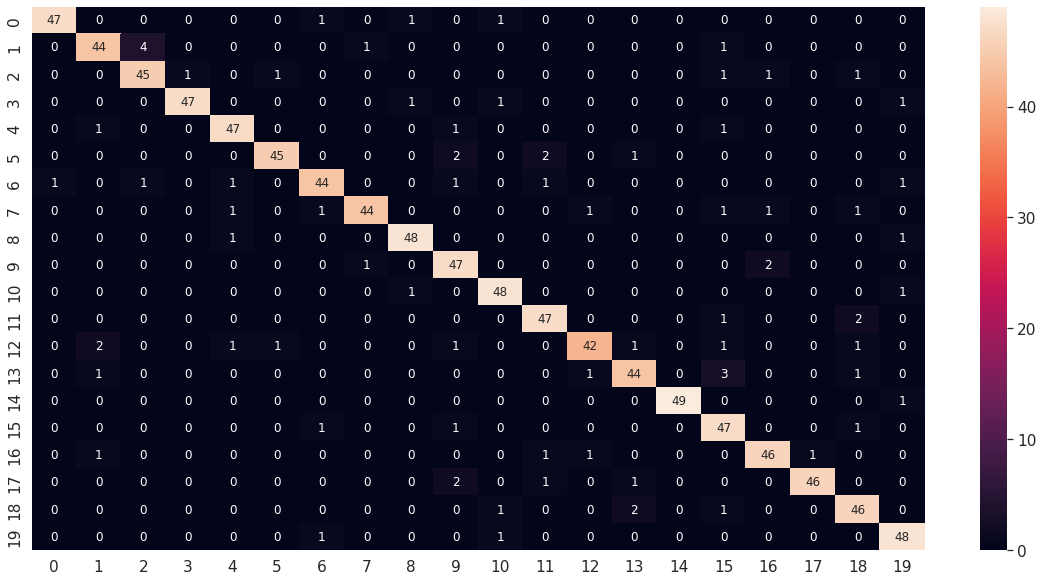

In [ ]:
# Visualizamos la matriz de confusión
deepface_model_vgg4_5_df_CM = pd.DataFrame(deepface_model_vgg4_5_CM, range(20), range(20))  
plt.figure(figsize = (20,10))  
seaborn.set(font_scale=1.4) #for label size  
seaborn.heatmap(deepface_model_vgg4_5_df_CM, annot=True, annot_kws={"size": 12}) # font size  
plt.show()  

In [ ]:
# Resumen de clasificación
deepface_model_vgg4_5_report = classification_report(np.argmax(testY, axis=1), predictedY, digits=4)  
print(deepface_model_vgg4_5_report)

              precision    recall  f1-score   support

           1     0.9792    0.9400    0.9592        50
           2     0.8980    0.8800    0.8889        50
           3     0.9000    0.9000    0.9000        50
           4     0.9792    0.9400    0.9592        50
           5     0.9216    0.9400    0.9307        50
           6     0.9574    0.9000    0.9278        50
           7     0.9167    0.8800    0.8980        50
           8     0.9565    0.8800    0.9167        50
           9     0.9412    0.9600    0.9505        50
          10     0.8545    0.9400    0.8952        50
          11     0.9231    0.9600    0.9412        50
          12     0.9038    0.9400    0.9216        50
          13     0.9333    0.8400    0.8842        50
          14     0.8980    0.8800    0.8889        50
          15     1.0000    0.9800    0.9899        50
          16     0.8246    0.9400    0.8785        50
          17     0.9200    0.9200    0.9200        50
          18     0.9787    

# 3. Modelo de Deep Learning: DeepID2

In [ ]:
# Carga del conjunto de datos comprimido
data = load(path + 'data_reconocimiento3/faces-dataset-ROF2_sunglasses.npz')
trainX, trainY, testX, testY = data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3']
print('Tamaño de data train:', trainX.shape)
print('Tamaño de data test:', testX.shape)

Tamaño de data train: (1601, 55, 47, 3)
Tamaño de data test: (200, 55, 47, 3)


In [ ]:
# Estandarización de los datos de entrenamiento y test
trainX = trainX/255
testX = testX/255
trainY = to_categorical(trainY)
testY = to_categorical(testY)

Sujeto #[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


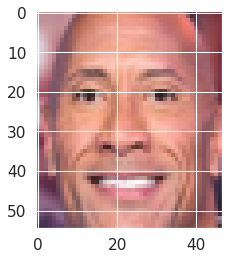

In [ ]:
# Ejemplo
print('Sujeto #{}'.format(trainY[20]))
plt.imshow(trainX[20])

## 3.1 Model con base de datos Yale para condiciones de iluminación
---
Modelo 17: (BTH = 20, EHS = 80, ValidSplit = 0.2, Dropout=0, INI = HeNormal, REG = L2, OPT = adam[0.001])


In [ ]:
# Carga del modelo obtenido durante el entrenamiento, evaluación del modelo con trainX, testX y generamos las predicciones a partir del testX
load_deepid_model_yale17 = load_model(path + 'data_reconocimiento3/models_YALE1/deepid_model_yale1_17.h5')

# Evaluación del modelo
train_loss, train_acc = load_deepid_model_yale17.evaluate(trainX, trainY)
test_loss, test_acc = load_deepid_model_yale17.evaluate(testX, testY)

18/18 [==============================] - 0s 8ms/step - loss: 0.0987 - accuracy: 0.9789


In [ ]:
# Matriz de confusión usando Scikit Learn
predY = load_deepid_model_yale17.predict(testX)  
predictedY = np.argmax(predY, axis=1)  #revisar el bias adecuado

#Creamos la matriz de confusión
deepid_model_yale17_CM = confusion_matrix(np.argmax(testY, axis=1), predictedY)

18/18 [==============================] - 0s 3ms/step


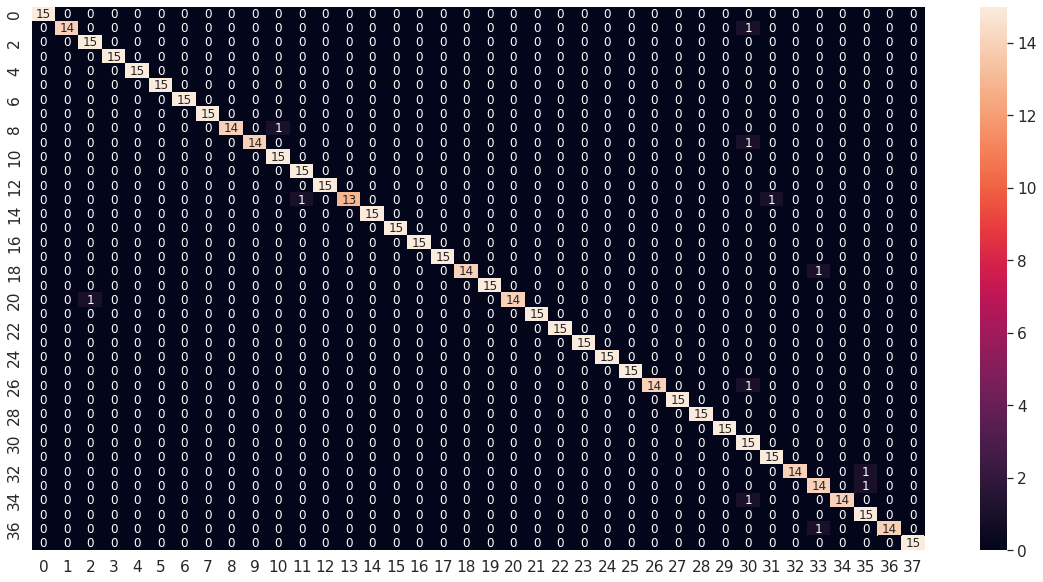

In [ ]:
# Visualizamos la matriz de confusión
deepid_model_yale17_df_CM = pd.DataFrame(deepid_model_yale17_CM, range(38), range(38))  
plt.figure(figsize = (20,10))  
seaborn.set(font_scale=1.4) #for label size  
seaborn.heatmap(deepid_model_yale17_df_CM, annot=True, annot_kws={"size": 12}) # font size  
plt.show()  

In [ ]:
# Resumen de clasificación
deepid_model_yale17_report = classification_report(np.argmax(testY, axis=1), predictedY, digits=4)  
print(deepid_model_yale17_report)

              precision    recall  f1-score   support

           1     1.0000    1.0000    1.0000        15
           2     1.0000    0.9333    0.9655        15
           3     0.9375    1.0000    0.9677        15
           4     1.0000    1.0000    1.0000        15
           5     1.0000    1.0000    1.0000        15
           6     1.0000    1.0000    1.0000        15
           7     1.0000    1.0000    1.0000        15
           8     1.0000    1.0000    1.0000        15
           9     1.0000    0.9333    0.9655        15
          10     1.0000    0.9333    0.9655        15
          11     0.9375    1.0000    0.9677        15
          12     0.9375    1.0000    0.9677        15
          13     1.0000    1.0000    1.0000        15
          15     1.0000    0.8667    0.9286        15
          16     1.0000    1.0000    1.0000        15
          17     1.0000    1.0000    1.0000        15
          18     1.0000    1.0000    1.0000        15
          19     1.0000    

## 3.2 Model con base de datos ROF1 para condiciones de oclusión
---
Modelo 9: (BTH = 10, EHS = 150, ValidSplit = 0.2, Dropout=0, INI = HeNormal, REG = L2, OPT = adam[0.001])


In [ ]:
# Carga del modelo obtenido durante el entrenamiento, evaluación del modelo con trainX, testX y generamos las predicciones a partir del testX
load_deepid_model_rof1_9 = load_model(path + 'data_reconocimiento3/models_ROF1/deepid_model_ROF1_9.h5')

# Evaluación del modelo
train_loss, train_acc = load_deepid_model_rof1_9.evaluate(trainX, trainY)
test_loss, test_acc = load_deepid_model_rof1_9.evaluate(testX, testY)

7/7 [==============================] - 0s 4ms/step - loss: 14.1623 - accuracy: 0.2450


In [ ]:
# Matriz de confusión usando Scikit Learn
predY = load_deepid_model_rof1_9.predict(testX)  
predictedY = np.argmax(predY, axis=1)  #revisar el bias adecuado

#Creamos la matriz de confusión
deepid_model_rof1_9_CM = confusion_matrix(np.argmax(testY, axis=1), predictedY)

7/7 [==============================] - 0s 3ms/step


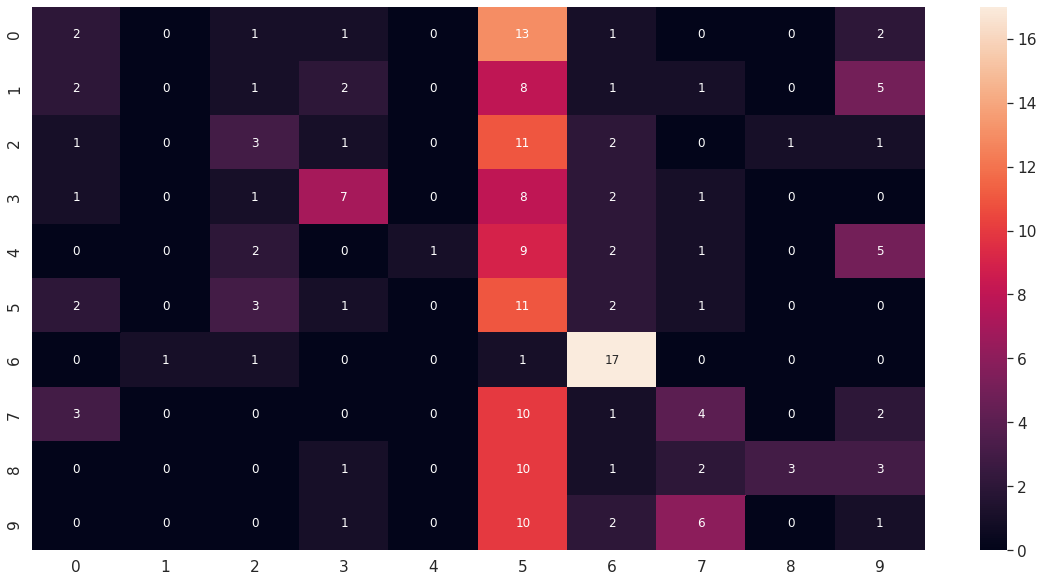

In [ ]:
# Visualizamos la matriz de confusión
deepid_model_rof1_9_df_CM = pd.DataFrame(deepid_model_rof1_9_CM, range(10), range(10))  
plt.figure(figsize = (20,10))  
seaborn.set(font_scale=1.4) #for label size  
seaborn.heatmap(deepid_model_rof1_9_df_CM, annot=True, annot_kws={"size": 12}) # font size  
plt.show()  

In [ ]:
# Resumen de clasificación mask
deepid_model_rof1_9_report = classification_report(np.argmax(testY, axis=1), predictedY, digits=4)  
print(deepid_model_rof1_9_report)

              precision    recall  f1-score   support

           1     0.6250    0.5000    0.5556        20
           2     0.8333    0.5000    0.6250        20
           3     0.3636    0.2000    0.2581        20
           4     0.7143    0.2500    0.3704        20
           5     0.8333    0.5000    0.6250        20
           6     0.3448    1.0000    0.5128        20
           7     0.6000    0.4500    0.5143        20
           8     0.7333    0.5500    0.6286        20
           9     0.7692    0.5000    0.6061        20
          10     0.3415    0.7000    0.4590        20

    accuracy                         0.5150       200
   macro avg     0.6158    0.5150    0.5155       200
weighted avg     0.6158    0.5150    0.5155       200



In [ ]:
# Resumen de clasificación sunglasses
deepid_model_rof1_9_report = classification_report(np.argmax(testY, axis=1), predictedY, digits=4)  
print(deepid_model_rof1_9_report)

              precision    recall  f1-score   support

           1     0.1818    0.1000    0.1290        20
           2     0.0000    0.0000    0.0000        20
           3     0.2500    0.1500    0.1875        20
           4     0.5000    0.3500    0.4118        20
           5     1.0000    0.0500    0.0952        20
           6     0.1209    0.5500    0.1982        20
           7     0.5484    0.8500    0.6667        20
           8     0.2500    0.2000    0.2222        20
           9     0.7500    0.1500    0.2500        20
          10     0.0526    0.0500    0.0513        20

    accuracy                         0.2450       200
   macro avg     0.3654    0.2450    0.2212       200
weighted avg     0.3654    0.2450    0.2212       200



## 3.3 Model con base de datos ROF2 para condiciones de oclusión
---
Modelo 9: (BTH = 10, EHS = 150, ValidSplit = 0.2, Dropout=0, INI = HeNormal, REG = L2, OPT = adam[0.001])


In [ ]:
# Carga del modelo obtenido durante el entrenamiento, evaluación del modelo con trainX, testX y generamos las predicciones a partir del testX
load_deepid_model_rof2_9 = load_model(path + 'data_reconocimiento3/models_ROF2/deepid_model_ROF2_9.h5')

# Evaluación del modelo
train_loss, train_acc = load_deepid_model_rof2_9.evaluate(trainX, trainY)
test_loss, test_acc = load_deepid_model_rof2_9.evaluate(testX, testY)

7/7 [==============================] - 0s 4ms/step - loss: 6.3164 - accuracy: 0.3450


In [ ]:
# Matriz de confusión usando Scikit Learn
predY = load_deepid_model_rof2_9.predict(testX)  
predictedY = np.argmax(predY, axis=1)  #revisar el bias adecuado

#Creamos la matriz de confusión
deepid_model_rof2_9_CM = confusion_matrix(np.argmax(testY, axis=1), predictedY)

7/7 [==============================] - 0s 3ms/step


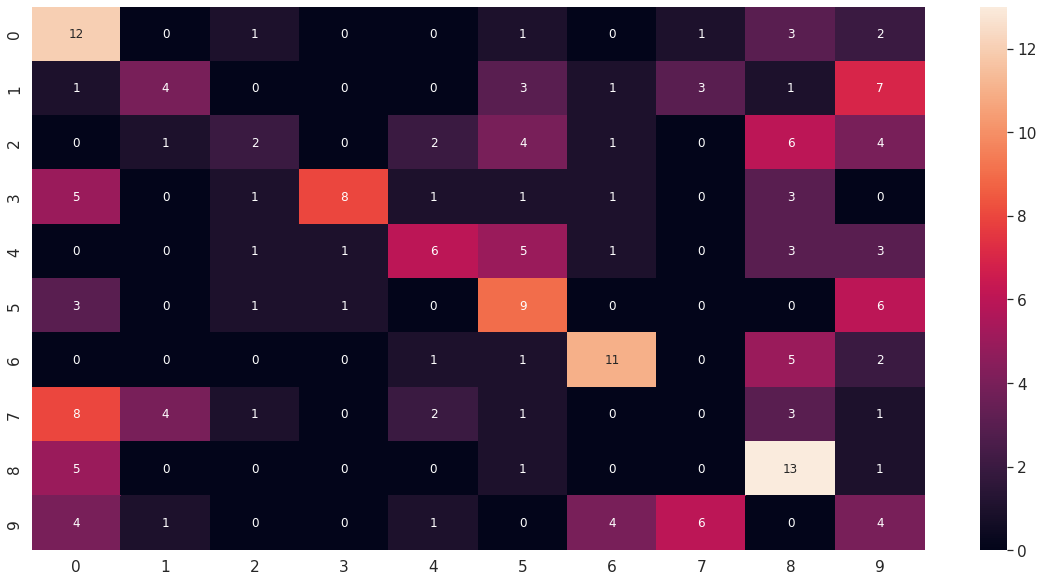

In [ ]:
# Visualizamos la matriz de confusión
deepid_model_rof2_9_df_CM = pd.DataFrame(deepid_model_rof2_9_CM, range(10), range(10))  
plt.figure(figsize = (20,10))  
seaborn.set(font_scale=1.4) #for label size  
seaborn.heatmap(deepid_model_rof2_9_df_CM, annot=True, annot_kws={"size": 12}) # font size  
plt.show()  

In [ ]:
# Resumen de clasificación mask
deepid_model_rof2_9_report = classification_report(np.argmax(testY, axis=1), predictedY, digits=4)  
print(deepid_model_rof2_9_report)

              precision    recall  f1-score   support

           1     0.7727    0.8500    0.8095        20
           2     0.7895    0.7500    0.7692        20
           3     0.6400    0.8000    0.7111        20
           4     0.8000    0.4000    0.5333        20
           5     0.8333    0.7500    0.7895        20
           6     0.7143    1.0000    0.8333        20
           7     0.8947    0.8500    0.8718        20
           8     0.8095    0.8500    0.8293        20
           9     0.7727    0.8500    0.8095        20
          10     0.8750    0.7000    0.7778        20

    accuracy                         0.7800       200
   macro avg     0.7902    0.7800    0.7734       200
weighted avg     0.7902    0.7800    0.7734       200



In [ ]:
# Resumen de clasificación sunglasses
deepid_model_rof2_9_report = classification_report(np.argmax(testY, axis=1), predictedY, digits=4)  
print(deepid_model_rof2_9_report)

              precision    recall  f1-score   support

           1     0.3158    0.6000    0.4138        20
           2     0.4000    0.2000    0.2667        20
           3     0.2857    0.1000    0.1481        20
           4     0.8000    0.4000    0.5333        20
           5     0.4615    0.3000    0.3636        20
           6     0.3462    0.4500    0.3913        20
           7     0.5789    0.5500    0.5641        20
           8     0.0000    0.0000    0.0000        20
           9     0.3514    0.6500    0.4561        20
          10     0.1333    0.2000    0.1600        20

    accuracy                         0.3450       200
   macro avg     0.3673    0.3450    0.3297       200
weighted avg     0.3673    0.3450    0.3297       200



## 3.4 Model con base de datos VGG-African para condiciones de etnia
---
Modelo 5: (BTH = 30, EHS = 200, ValidSplit = 0.2, Dropout=0, INI = HeNormal, REG = L2, OPT = adam[0.001])


In [ ]:
# Carga del modelo obtenido durante el entrenamiento, evaluación del modelo con trainX, testX y generamos las predicciones a partir del testX
load_deepid_model_vgg1_5 = load_model(path + 'data_reconocimiento3/models_VGG1/deepid_model_VGG1_5.h5')

# Evaluación del modelo
train_loss, train_acc = load_deepid_model_vgg1_5.evaluate(trainX, trainY)
test_loss, test_acc = load_deepid_model_vgg1_5.evaluate(testX, testY)

32/32 [==============================] - 0s 4ms/step - loss: 0.6883 - accuracy: 0.8740


In [ ]:
# Matriz de confusión usando Scikit Learn
predY = load_deepid_model_vgg1_5.predict(testX)  
predictedY = np.argmax(predY, axis=1)  #revisar el bias adecuado

#Creamos la matriz de confusión
deepid_model_vgg1_5_CM = confusion_matrix(np.argmax(testY, axis=1), predictedY)

32/32 [==============================] - 0s 3ms/step


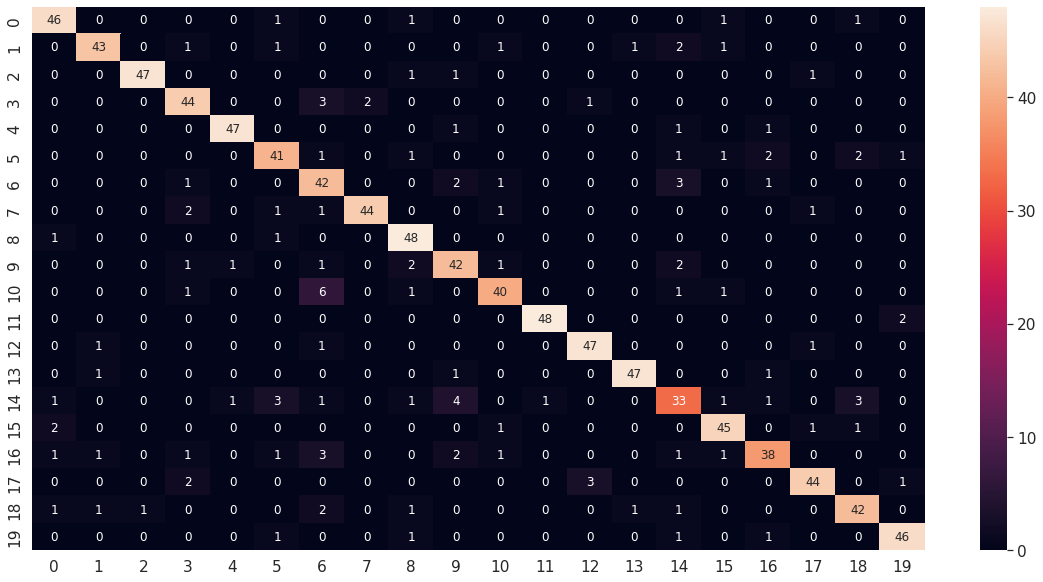

In [ ]:
# Visualizamos la matriz de confusión
deepid_model_vgg1_5_df_CM = pd.DataFrame(deepid_model_vgg1_5_CM, range(20), range(20))  
plt.figure(figsize = (20,10))  
seaborn.set(font_scale=1.4) #for label size  
seaborn.heatmap(deepid_model_vgg1_5_df_CM, annot=True, annot_kws={"size": 12}) # font size  
plt.show()  

In [ ]:
# Resumen de clasificación
deepid_model_vgg1_5_report = classification_report(np.argmax(testY, axis=1), predictedY, digits=4)  
print(deepid_model_vgg1_5_report)

              precision    recall  f1-score   support

           1     0.8846    0.9200    0.9020        50
           2     0.9149    0.8600    0.8866        50
           3     0.9792    0.9400    0.9592        50
           4     0.8302    0.8800    0.8544        50
           5     0.9592    0.9400    0.9495        50
           6     0.8200    0.8200    0.8200        50
           7     0.6885    0.8400    0.7568        50
           8     0.9565    0.8800    0.9167        50
           9     0.8421    0.9600    0.8972        50
          10     0.7925    0.8400    0.8155        50
          11     0.8696    0.8000    0.8333        50
          12     0.9796    0.9600    0.9697        50
          13     0.9216    0.9400    0.9307        50
          14     0.9592    0.9400    0.9495        50
          15     0.7174    0.6600    0.6875        50
          16     0.8824    0.9000    0.8911        50
          17     0.8444    0.7600    0.8000        50
          18     0.9167    

## 3.5 Model con base de datos VGG-Asian para condiciones de etnia
---
Modelo 8: (BTH = 10, EHS = 150, ValidSplit = 0.2, Dropout=0, INI = HeNormal, REG = L2, OPT = adam[0.001])


In [ ]:
# Carga del modelo obtenido durante el entrenamiento, evaluación del modelo con trainX, testX y generamos las predicciones a partir del testX
load_deepid_model_vgg2_8 = load_model(path + 'data_reconocimiento3/models_VGG2/deepid_model_VGG2_8.h5')

# Evaluación del modelo
train_loss, train_acc = load_deepid_model_vgg2_8.evaluate(trainX, trainY)
test_loss, test_acc = load_deepid_model_vgg2_8.evaluate(testX, testY)

32/32 [==============================] - 0s 4ms/step - loss: 1.3278 - accuracy: 0.8110


In [ ]:
# Matriz de confusión usando Scikit Learn
predY = load_deepid_model_vgg2_8.predict(testX)  
predictedY = np.argmax(predY, axis=1)  #revisar el bias adecuado

#Creamos la matriz de confusión
deepid_model_vgg2_8_CM = confusion_matrix(np.argmax(testY, axis=1), predictedY)

32/32 [==============================] - 0s 2ms/step


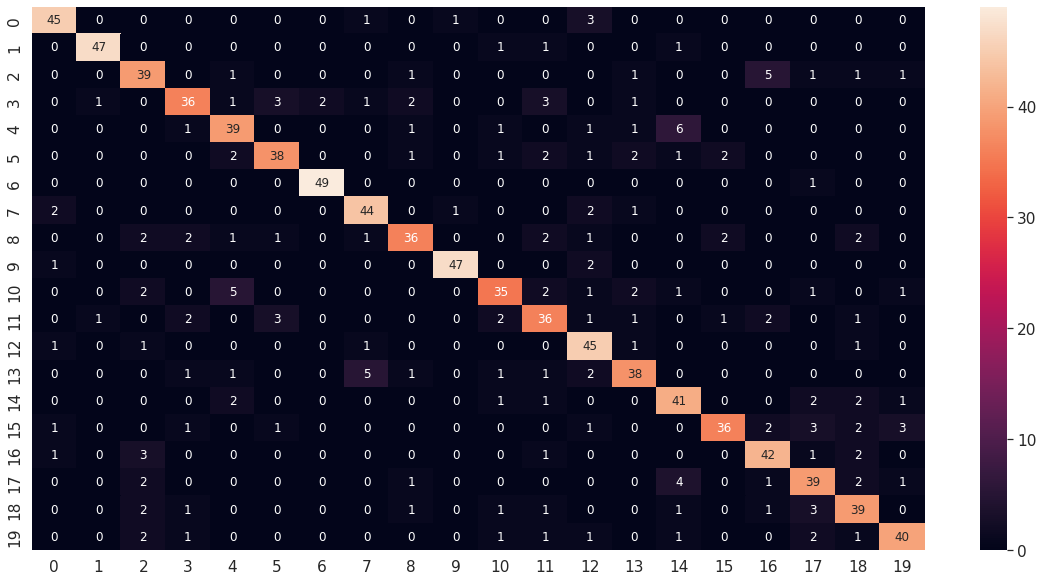

In [ ]:
# Visualizamos la matriz de confusión
deepid_model_vgg2_8_df_CM = pd.DataFrame(deepid_model_vgg2_8_CM, range(20), range(20))  
plt.figure(figsize = (20,10))  
seaborn.set(font_scale=1.4) #for label size  
seaborn.heatmap(deepid_model_vgg2_8_df_CM, annot=True, annot_kws={"size": 12}) # font size  
plt.show()  

In [ ]:
# Resumen de clasificación
deepid_model_vgg2_8_report = classification_report(np.argmax(testY, axis=1), predictedY, digits=4)  
print(deepid_model_vgg2_8_report)

              precision    recall  f1-score   support

           1     0.8824    0.9000    0.8911        50
           2     0.9592    0.9400    0.9495        50
           3     0.7358    0.7800    0.7573        50
           4     0.8000    0.7200    0.7579        50
           5     0.7500    0.7800    0.7647        50
           6     0.8261    0.7600    0.7917        50
           7     0.9608    0.9800    0.9703        50
           8     0.8302    0.8800    0.8544        50
           9     0.8182    0.7200    0.7660        50
          10     0.9592    0.9400    0.9495        50
          11     0.7955    0.7000    0.7447        50
          12     0.7059    0.7200    0.7129        50
          13     0.7377    0.9000    0.8108        50
          14     0.7917    0.7600    0.7755        50
          15     0.7321    0.8200    0.7736        50
          16     0.8780    0.7200    0.7912        50
          17     0.7925    0.8400    0.8155        50
          18     0.7358    

## 3.6 Model con base de datos VGG-Latin para condiciones de etnia
---
Modelo 8: (BTH = 40, EHS = 200, ValidSplit = 0.2, Dropout=0, INI = HeNormal, REG = L2, OPT = adam[0.001])


In [ ]:
# Carga del modelo obtenido durante el entrenamiento, evaluación del modelo con trainX, testX y generamos las predicciones a partir del testX
load_deepid_model_vgg3_8 = load_model(path + 'data_reconocimiento3/models_VGG3/deepid_model_VGG3_8.h5')

# Evaluación del modelo
train_loss, train_acc = load_deepid_model_vgg3_8.evaluate(trainX, trainY)
test_loss, test_acc = load_deepid_model_vgg3_8.evaluate(testX, testY)

32/32 [==============================] - 0s 3ms/step - loss: 0.7263 - accuracy: 0.8900


In [ ]:
# Matriz de confusión usando Scikit Learn
predY = load_deepid_model_vgg3_8.predict(testX)  
predictedY = np.argmax(predY, axis=1)  #revisar el bias adecuado

#Creamos la matriz de confusión
deepid_model_vgg3_8_CM = confusion_matrix(np.argmax(testY, axis=1), predictedY)

32/32 [==============================] - 0s 2ms/step


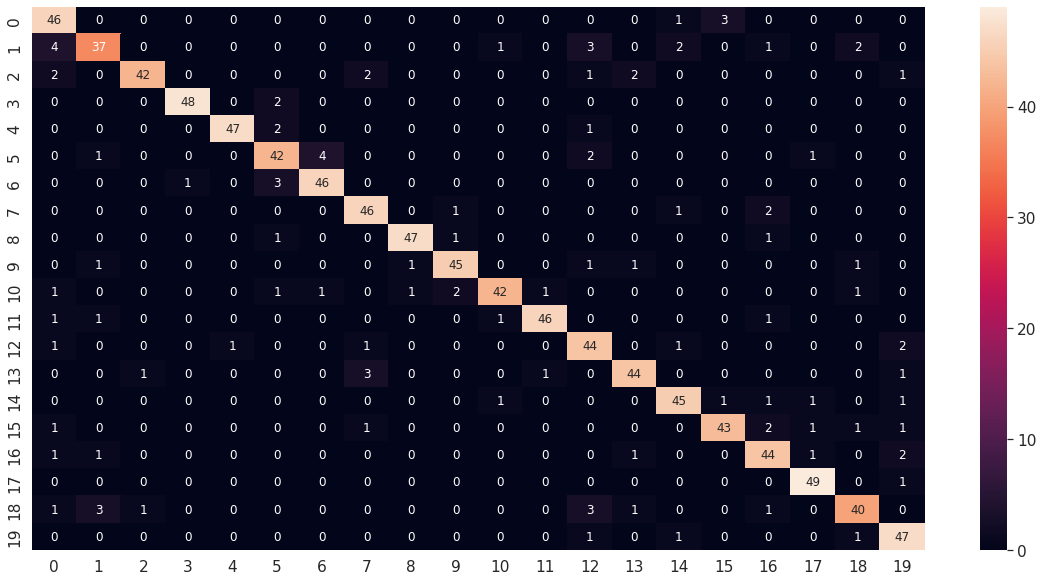

In [ ]:
# Visualizamos la matriz de confusión
deepid_model_vgg3_8_df_CM = pd.DataFrame(deepid_model_vgg3_8_CM, range(20), range(20))  
plt.figure(figsize = (20,10))  
seaborn.set(font_scale=1.4) #for label size  
seaborn.heatmap(deepid_model_vgg3_8_df_CM, annot=True, annot_kws={"size": 12}) # font size  
plt.show()  

In [ ]:
# Resumen de clasificación
deepid_model_vgg3_8_report = classification_report(np.argmax(testY, axis=1), predictedY, digits=4)  
print(deepid_model_vgg3_8_report)

              precision    recall  f1-score   support

           1     0.7931    0.9200    0.8519        50
           2     0.8409    0.7400    0.7872        50
           3     0.9545    0.8400    0.8936        50
           4     0.9796    0.9600    0.9697        50
           5     0.9792    0.9400    0.9592        50
           6     0.8235    0.8400    0.8317        50
           7     0.9020    0.9200    0.9109        50
           8     0.8679    0.9200    0.8932        50
           9     0.9592    0.9400    0.9495        50
          10     0.9184    0.9000    0.9091        50
          11     0.9333    0.8400    0.8842        50
          12     0.9583    0.9200    0.9388        50
          13     0.7857    0.8800    0.8302        50
          14     0.8980    0.8800    0.8889        50
          15     0.8824    0.9000    0.8911        50
          16     0.9149    0.8600    0.8866        50
          17     0.8302    0.8800    0.8544        50
          18     0.9245    

## 3.7 Model con base de datos VGG-Indian para condiciones de etnia
---
Modelo 10: (BTH = 20, EHS = 200, ValidSplit = 0.2, Dropout=0, INI = HeNormal, REG = L2, OPT = adam[0.001])


In [ ]:
# Carga del modelo obtenido durante el entrenamiento, evaluación del modelo con trainX, testX y generamos las predicciones a partir del testX
load_deepid_model_vgg4_10 = load_model(path + 'data_reconocimiento3/models_VGG4/deepid_model_VGG4_10.h5')

# Evaluación del modelo
train_loss, train_acc = load_deepid_model_vgg4_10.evaluate(trainX, trainY)
test_loss, test_acc = load_deepid_model_vgg4_10.evaluate(testX, testY)

32/32 [==============================] - 0s 4ms/step - loss: 0.7807 - accuracy: 0.8650


In [ ]:
# Matriz de confusión usando Scikit Learn
predY = load_deepid_model_vgg4_10.predict(testX)  
predictedY = np.argmax(predY, axis=1)  #revisar el bias adecuado

#Creamos la matriz de confusión
deepid_model_vgg4_10_CM = confusion_matrix(np.argmax(testY, axis=1), predictedY)

32/32 [==============================] - 0s 3ms/step


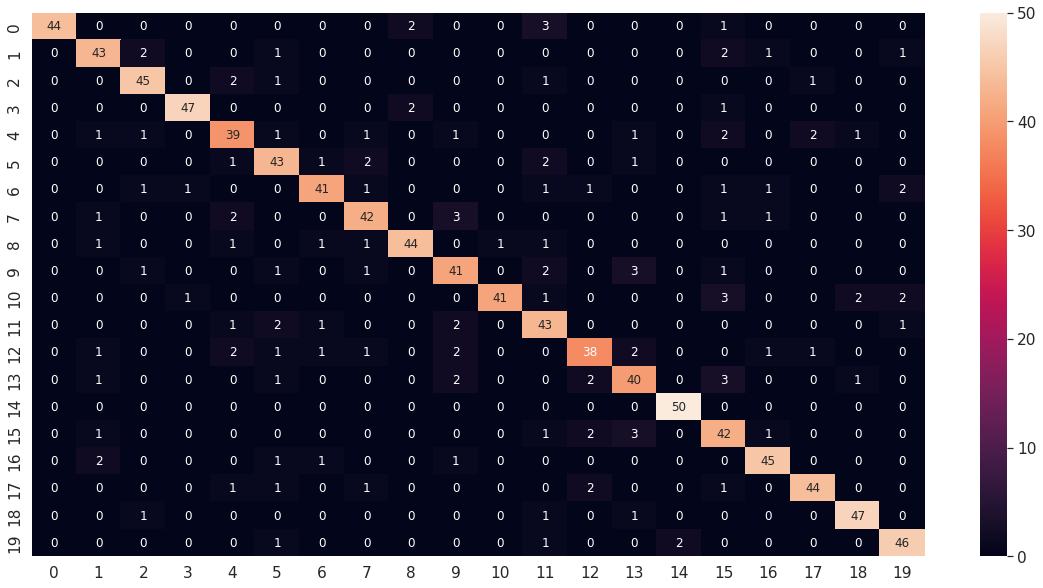

In [ ]:
# Visualizamos la matriz de confusión
deepid_model_vgg4_10_df_CM = pd.DataFrame(deepid_model_vgg4_10_CM, range(20), range(20))  
plt.figure(figsize = (20,10))  
seaborn.set(font_scale=1.4) #for label size  
seaborn.heatmap(deepid_model_vgg4_10_df_CM, annot=True, annot_kws={"size": 12}) # font size  
plt.show()  

In [ ]:
# Resumen de clasificación
deepid_model_vgg4_10_report = classification_report(np.argmax(testY, axis=1), predictedY, digits=4)  
print(deepid_model_vgg4_10_report)

              precision    recall  f1-score   support

           1     1.0000    0.8800    0.9362        50
           2     0.8431    0.8600    0.8515        50
           3     0.8824    0.9000    0.8911        50
           4     0.9592    0.9400    0.9495        50
           5     0.7959    0.7800    0.7879        50
           6     0.7963    0.8600    0.8269        50
           7     0.8913    0.8200    0.8542        50
           8     0.8400    0.8400    0.8400        50
           9     0.9167    0.8800    0.8980        50
          10     0.7885    0.8200    0.8039        50
          11     0.9762    0.8200    0.8913        50
          12     0.7544    0.8600    0.8037        50
          13     0.8444    0.7600    0.8000        50
          14     0.7843    0.8000    0.7921        50
          15     0.9615    1.0000    0.9804        50
          16     0.7241    0.8400    0.7778        50
          17     0.9000    0.9000    0.9000        50
          18     0.9167    